<a href="https://colab.research.google.com/github/Yasna79/Challenge-1-Alura-Stores/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [91]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [84]:
from matplotlib import pyplot as plt

# Agregamos un id para las tiendas
tienda['id'] = 'Tienda 1'
tienda2['id'] = 'Tienda 2'
tienda3['id'] = 'Tienda 3'
tienda4['id'] = 'Tienda 4'

# Unimos todas las tiendas en un solo dataframe
all_stores = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupamos por id (tienda) y las sumamos
facturacion_tiendas = all_stores.groupby('id')['Precio'].sum().reset_index()

facturacion_tiendas.head()


,id,Precio
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


# 2. Ventas por categoría

In [85]:
# Agrupsmos por tienda, categoria y contamos producto, lo ordanamos por tienda y categoria producto en orden descendiente para recuperar los mayores por tiendas
ventas_categoria = (
    all_stores
    .groupby(['id', 'Categoría del Producto'])['Precio']
    .count()
    .reset_index()
    .sort_values(by=['id', 'Categoría del Producto'], ascending=False,)
)

# Recuperamos el primer record de cada tienda, de esa forma nos quedamos con el mayor de cada uno
productos_mayores = ventas_categoria.groupby('id').head(1).reset_index(drop=True).sort_values(by='id')

productos_mayores.head()


,id,Categoría del Producto,Precio
3,Tienda 1,Muebles,465
2,Tienda 2,Muebles,442
1,Tienda 3,Muebles,499
0,Tienda 4,Muebles,480


# 3. Calificación promedio de la tienda


In [86]:
# Aqui calculo la calificación promedio de cada tienda
calificacion_tienda = (
    all_stores
    .groupby('id')['Calificación']
    .mean()
    .reset_index()
)

calificacion_tienda.head()



,id,Calificación
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


# 4. Productos más y menos vendido

In [87]:
# Contamos los productos por tienda
producto_menos_mas_vendidos = (
    all_stores
    .groupby(['id','Producto'])['Precio']
    .agg(['count'])
    .reset_index()
)

# Odenamos por tienda y numero de ventas, lo agrupamos por tienda y nos quedamos con el mayor
producto_mas_vendido =(
    producto_menos_mas_vendidos
    .sort_values(by=['id','count'], ascending=[True, False])
    .groupby(['id'])
    .head(1)
    .reset_index(drop=True)
)

producto_mas_vendido.head()


,id,Producto,count
0,Tienda 1,Armario,60
1,Tienda 2,Iniciando en programación,65
2,Tienda 3,Kit de bancas,57
3,Tienda 4,Cama box,62


In [10]:
# Odenamos por tienda y numero de ventas, lo agrupamos por tienda y nos quedamos con el menor
producto_menos_vendido =(
    producto_menos_mas_vendidos
    .sort_values(by=['id','count'], ascending=[True, False])
    .groupby(['id'])
    .tail(1)
    .reset_index(drop=True)
)
producto_menos_vendido.head()

,id,Producto,count
0,Tienda 1,Celular ABXY,33
1,Tienda 2,Juego de mesa,32
2,Tienda 3,Bloques de construcción,35
3,Tienda 4,Guitarra eléctrica,33


In [89]:
# Uno el Dataframe del producto mas vendidio con el menos vendido, cuando la tienda sea igual en ambos DF
resultado = pd.merge(producto_mas_vendido, producto_menos_vendido, on='id')

# Renombro los campos de salida
resultado.columns = ['id', 'producto_mas_vendido', 'cantidad_mas_vendido', 'producto_menos_vendido', 'cantidad_menos_vendido']

resultado.head()

,id,producto_mas_vendido,cantidad_mas_vendido,producto_menos_vendido,cantidad_menos_vendido
0,Tienda 1,Armario,60,Celular ABXY,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


# 5. Valor del envío promedio por tienda




In [90]:
# Agrupamos por tienda y calculamos el promedio del costo de envío
total_valor_envio = (
    all_stores
    .groupby('id')['Costo de envío']
    .agg(['sum', 'mean'])
    .reset_index()
    .rename(columns={
        'sum': 'total_costo_envio',
        'mean': 'promedio_costo_envio'
    })
)

total_ventas = (
    all_stores
    .groupby('id', as_index=False)['Precio']
    .sum()
    .rename(columns={'Precio': 'total_venta'})

)
# aqui renombro la columna precio a total ventas
porcentajes_gastos = pd.merge(total_valor_envio, total_ventas, on='id')

porcentajes_gastos['porcentaje_gasto__promedio_envio'] = (porcentajes_gastos['total_costo_envio'] * 100) / porcentajes_gastos['total_venta']



porcentajes_gastos.head()


,id,total_costo_envio,promedio_costo_envio,total_venta,porcentaje_gasto__promedio_envio
0,Tienda 1,61377900.0,26018.609580,1.150880e+09,5.333126
1,Tienda 2,59485100.0,25216.235693,1.116344e+09,5.328566
2,Tienda 3,58516600.0,24805.680373,1.098020e+09,5.329286
3,Tienda 4,55317400.0,23459.457167,1.038376e+09,5.327301


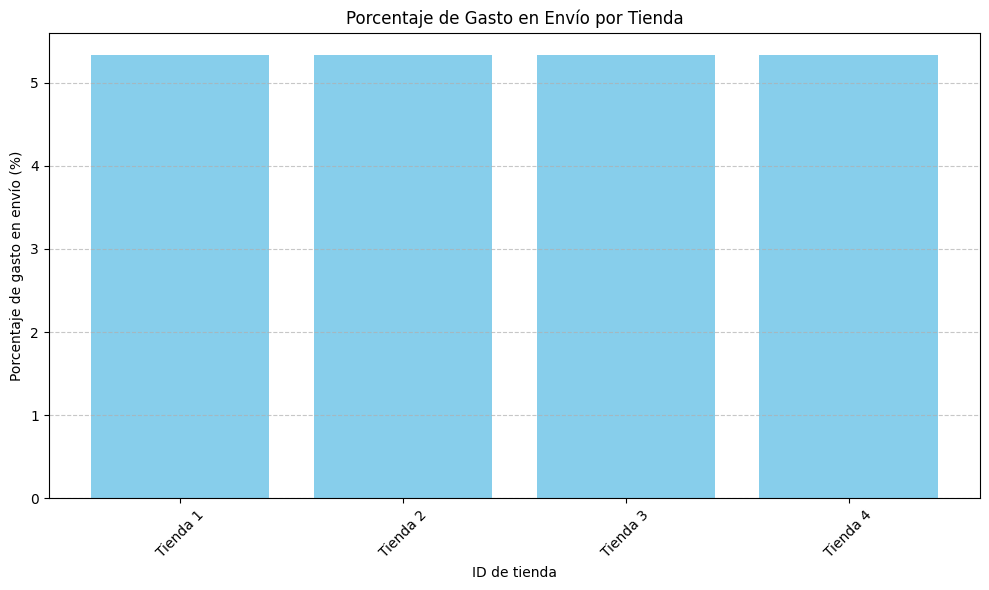

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(
    porcentajes_gastos['id'],
    porcentajes_gastos['porcentaje_gasto__promedio_envio'],
    color='skyblue'
)
plt.title('Porcentaje de Gasto en Envío por Tienda')
plt.xlabel('ID de tienda')
plt.ylabel('Porcentaje de gasto en envío (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


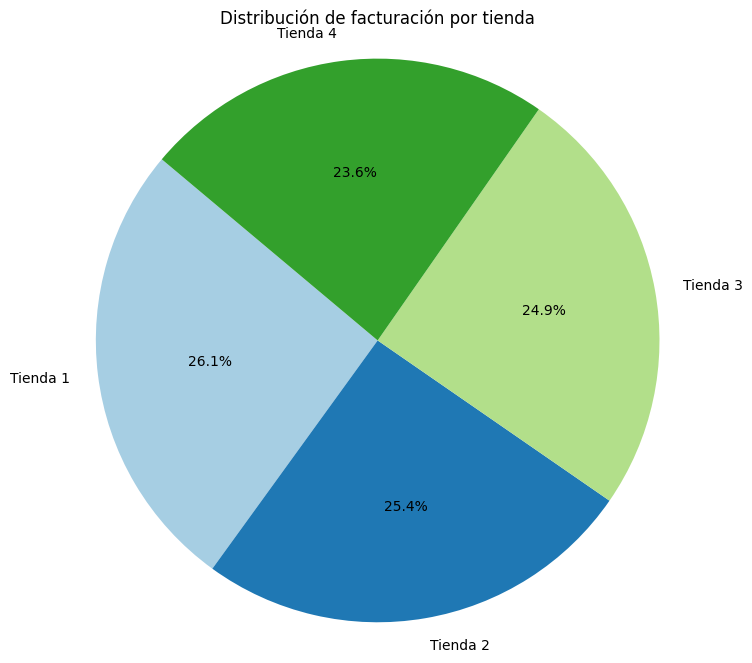

In [71]:
# Datos Facturacion
labels = facturacion_tiendas['id']
sizes = facturacion_tiendas['Precio']

# Gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribución de facturación por tienda')
plt.axis('equal')
plt.show()

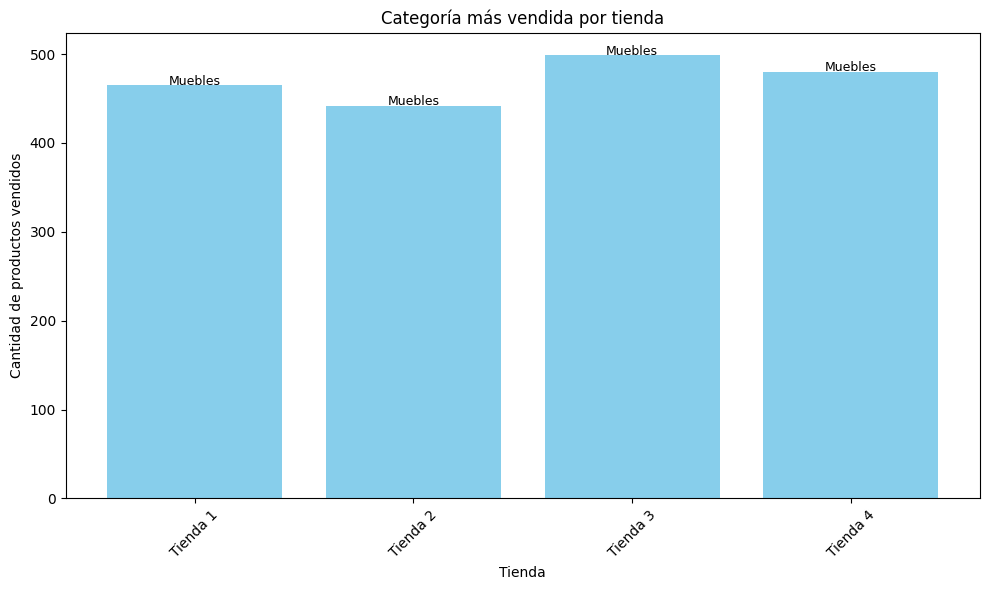

In [72]:
# Ventas por categoria
tiendas = productos_mayores['id']
ventas = productos_mayores['Precio']  # este es el count
categorias = productos_mayores['Categoría del Producto']

# Crear gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(tiendas, ventas, color='skyblue')

# Agregar etiquetas con la categoría más vendida
for bar, categoria in zip(bars, categorias):
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y + 0.5, categoria, ha='center', fontsize=9)

# Estética del gráfico
plt.title('Categoría más vendida por tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de productos vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

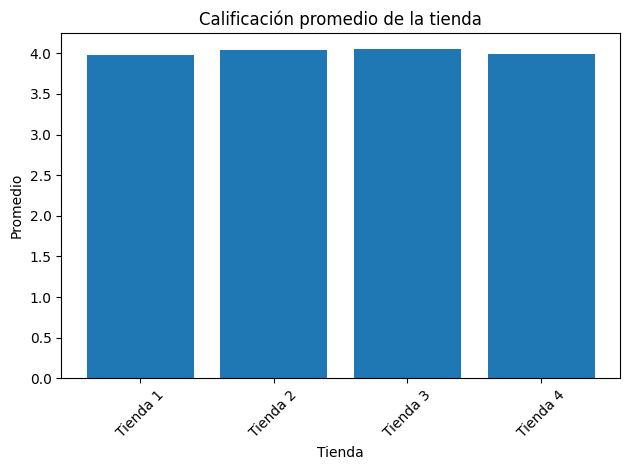

In [73]:
# calificacion_tienda

plt.bar(x=calificacion_tienda['id'], height=calificacion_tienda['Calificación'])
plt.xlabel('Tienda')
plt.ylabel('Promedio')
plt.title('Calificación promedio de la tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

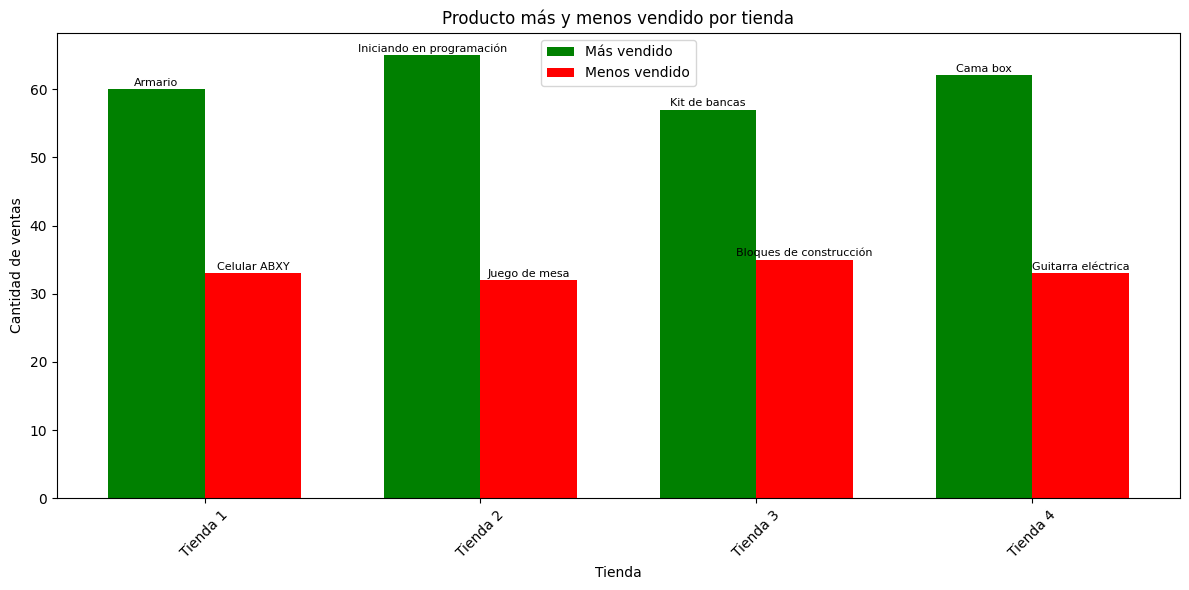

In [83]:

#Prodcutos mas y menos vendidos
tiendas = resultado['id']
cantidad_mas = resultado['cantidad_mas_vendido']
cantidad_menos = resultado['cantidad_menos_vendido']
productos_mas = resultado['producto_mas_vendido']
productos_menos = resultado['producto_menos_vendido']

# Configuramos las posiciones de las barras
x = np.arange(len(tiendas))
width = 0.35

# Crear gráfico
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width/2, cantidad_mas, width, label='Más vendido', color='green')
bars2 = plt.bar(x + width/2, cantidad_menos, width, label='Menos vendido', color='red')

# Etiquetas con nombres de productos encima de cada barra
for bar, label in zip(bars1, productos_mas):
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.5, label, ha='center', fontsize=8)

for bar, label in zip(bars2, productos_menos):
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.5, label, ha='center', fontsize=8)

# Estética
plt.title('Producto más y menos vendido por tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de ventas')
plt.xticks(x, tiendas, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Análisis Comparativo por Tienda:

# Facturación Total (Ventas Totales):


*   Tienda 1: $1,150,880,400.0 (La más alta)

*   Tienda 2: $1,116,343,500.0

*   Tienda 3: $1,098,019,600.0

*   Tienda 4: $1,038,375,700.0 (La más baja)

***Observación:***: Tienda 4 tiene la facturación total significativamente más baja en comparación con las otras tres. Tienda 1 lidera claramente en ventas.

# Ventas por Categoría (Muebles):



*   LiTienda 1: 465 unidadesst item

*  Tienda 2: 442 unidades (La más baja en esta categoría)st item

*   Tienda 3: 499 unidades (La más alta en esta categoría)

*   Tienda 4: 480 unidades


***Observación:*** Aunque Tienda 4 tiene las ventas totales más bajas, vende una cantidad considerable de muebles, superando a Tienda 1 y Tienda 2 en esta categoría específica. Tienda 3 es la líder en ventas de muebles. Es importante notar que esto es solo una categoría y puede no representar el rendimiento general de ventas de productos.

# Calificación Promedio del Cliente:



*  Tienda 1: 3.977 (La más baja)

*  Tienda 2: 4.037

*   Tienda 3: 4.048 (La más alta)

*   Tienda 4: 3.996 (La segunda más baja)



***Observación:*** Tienda 3 tiene la mejor calificación, seguida de cerca por Tienda 2. Tienda 1 y Tienda 4 tienen calificaciones por debajo de 4.0, siendo la de Tienda 1 la más baja. Esto podría indicar problemas de satisfacción del cliente en estas dos tiendas.
Productos Más y Menos Vendidos:



*  Tienda 1: Armario (60) / Celular ABXY (33)

*  Tienda 2: Iniciando en programación (65 - Mayor cantidad del más vendido) / Juego de mesa (32 - Menor cantidad del menos vendido)

*   Tienda 3: Kit de bancas (57) / Bloques de construcción (35 - Mayor cantidad del menos vendido)

*   Tienda 4: Cama box (62) / Guitarra eléctrica (33)




 ***Observación:*** Tienda 2 parece tener un producto estrella muy popular ("Iniciando en programación" con 65 unidades) y un producto menos popular con ventas muy bajas (32 unidades). Tienda 3, por otro lado, tiene la mayor cantidad vendida de su producto menos popular, lo que podría sugerir una menor diferencia entre los productos más y menos demandados o quizás problemas para mover los productos menos populares en las otras tiendas.

# Costos de Envío:


*  Tienda 1: 5.333% del total de ventas

*  Tienda 2: 5.329% del total de ventas

*  Tienda 3: 5.329% del total de ventas

*  Tienda 4: 5.327% del total de ventas (El porcentaje más bajo)



Observación: Todas las tiendas tienen un porcentaje de gasto en envío muy similar respecto a sus ventas totales. Tienda 4 es marginalmente la más eficiente en este aspecto, pero la diferencia es mínima y probablemente no sea un factor decisivo.
Síntesis y Recomendación:

# Al evaluar los indicadores clave:

***Ventas:*** Tienda 4 es la más débil, con una diferencia notable respecto a las demás.
Calificación del Cliente: Tienda 1 y Tienda 4 son las más bajas, indicando posibles problemas de servicio o satisfacción. Tienda 1 tiene la peor calificación.
Costos de Envío: Muy similares en todas las tiendas como porcentaje de las ventas.
Ventas Específicas (Muebles / Más/Menos Vendidos): Proporcionan información interesante pero no son tan concluyentes como las ventas totales o la calificación general. Por ejemplo, la baja calificación de Tienda 1 podría ser un problema mayor a largo plazo que las bajas ventas de Tienda 4, aunque esta última tiene el rendimiento financiero más bajo actualmente.
Recomendación:

Basándose únicamente en los datos proporcionados, la tienda más débil en términos generales es Tienda 4.

***¿Por qué?***

***Menor Rendimiento Financiero:*** Registra el total vendido más bajo de las cuatro tiendas, con una diferencia considerable ($1,038M frente a $1,098M de la siguiente tienda más baja). Este es a menudo el factor más crítico en decisiones de cierre.
***Baja Satisfacción del Cliente:*** Tiene la segunda calificación de cliente más baja (3.996), apenas por encima de Tienda 1. Una baja calificación puede indicar problemas subyacentes y afectar la lealtad y las ventas futuras.
Aunque Tienda 1 tiene la peor calificación de cliente, sus ventas totales son las más altas, lo que podría justificar esfuerzos para mejorar la experiencia del cliente en lugar de un cierre inmediato. Tienda 4 combina el peor rendimiento en ventas con una calificación de cliente mediocre.

# Consideraciones Adicionales (No incluidas en los datos):

***Rentabilidad:*** Los datos muestran ventas brutas, pero no los márgenes de beneficio ni los costos operativos (alquiler, personal, etc.) de cada tienda. Una tienda con altas ventas podría tener baja rentabilidad.
Potencial de Crecimiento: ¿Alguna tienda está en un mercado en expansión? ¿Hay planes de mejora?
Importancia Estratégica: ¿Alguna tienda cumple un rol específico en la red (e.g., logística, presencia en un mercado clave)?

# Conclusión Final:

Con la información disponible, Tienda 4 es la candidata más lógica para el cierre debido a su combinación de las ventas totales más bajas y una calificación de cliente relativamente baja.